In [1]:
%matplotlib inline

import pandas as pd

# import captest as pvc
from captest import capdata as pvc
from bokeh.io import output_notebook, show

# uncomment below two lines to use cptest.scatter_hv in notebook
# import holoviews as hv
# hv.extension('bokeh')

#if working offline with the CapData.plot() method may fail
#run 'export BOKEH_RESOURCES=inline' at the command line before
#running the jupyter notebook

output_notebook()

Loading BokehJS ...

# Example Capacity Test using Captest

The captest module of the Captest package contains the `CapData` class and a few functions top level functions. `CapData` objects hold simulated data from PVsyst (or other simulation) and measured data from a DAS or SCADA system and provide methods to load, filter, and visualize the data and methods for performing regressions on the filtered data.

This example goes through typical steps of performing a capacity test following the ASTM E2848 standard using the Captest package.


## Load and Plot Measured Data

We begin by instantiating a `CapData` object, which we will use to load and store the measured data.  In this example we will calculate reporting conditions from the measured data, so we load and filter the measured data first.

In [2]:
das = pvc.CapData('das')

The `load_data` method by default will look for and attempt to load all csvs in a 'data' folder.  In this case we have a single file and provide the filename, so only the file specified is loaded.

In [3]:
das.load_data(fname='example_meas_data.csv', source='AlsoEnergy')

-0.021046636 in Weather Station 1 WindSpeed, mph is below 0 for wind
-0.020492368 in Weather Station 2 WindSpeed, mph is below 0 for wind


The `load_data` method assigns the data to the dataframe attribute `df` of the `CapData` object.

In [4]:
das.df.head(3)

,"Weather Station 1 Sun, W/m^2","Weather Station 2 Sun, W/m^2","Weather Station 1 Sun2, W/m^2","Weather Station 2 Sun2, W/m^2","Weather Station 1 TempF, çF","Weather Station 2 TempF, çF","Weather Station 1 Temp1, çF","Weather Station 2 Temp1, çF","Weather Station 1 WindSpeed, mph","Weather Station 2 WindSpeed, mph","Elkor Production Meter KW, kW","Inverter 1 KW, kW","Inverter 2 KW, kW","Inverter 3 KW, kW","Inverter 4 KW, kW","Inverter 5 KW, kW","Inverter 6 KW, kW","Inverter 7 KW, kW","Inverter 8 KW, kW",index
1990-10-09 00:00:00,0.0,0.0,0.0,0.0,17.750666,17.770821,15.640355,15.526537,-0.000721,-0.007221,-8868.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,10/09/1990 00 00
1990-10-09 00:05:00,0.0,0.0,0.0,0.0,17.737545,17.753030,15.551920,15.706825,-0.008876,-0.007195,-8868.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,10/09/1990 00 05
1990-10-09 00:10:00,0.0,0.0,0.0,0.0,17.648090,17.689437,15.541516,15.506857,0.008686,0.002557,-8868.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,-150.0,10/09/1990 00 10


The `load_data` method by default attempts to infer the type of measurement and the type of sensor in each column of the dataframe.  For example, a measurement from a ambient temperature sensor would be categorized as 'temp-amb-'.  A python dictionary which translates from the column titles in the input file and the inferred type is created and saved to the `trans` attribute. This translation dictionary is used in the `view` and `rview` methods to easily access columns of data of a certain type without renaming columns or typing long column names.  This dictionary also enables much of the functionality of the `CapData` class methods to perform common capacity testing tasks, like generating scatter plots and performing regressions, with minimal user input.

In [5]:
das.trans

{'-inv-': ['Inverter 1 KW, kW',
  'Inverter 2 KW, kW',
  'Inverter 3 KW, kW',
  'Inverter 4 KW, kW',
  'Inverter 5 KW, kW',
  'Inverter 6 KW, kW',
  'Inverter 7 KW, kW',
  'Inverter 8 KW, kW'],
 'irr-poa-': ['Weather Station 1 Sun, W/m^2', 'Weather Station 2 Sun, W/m^2'],
 'wind--': ['Weather Station 1 WindSpeed, mph',
  'Weather Station 2 WindSpeed, mph'],
 'irr-ghi-': ['Weather Station 1 Sun2, W/m^2',
  'Weather Station 2 Sun2, W/m^2'],
 'temp-amb-': ['Weather Station 1 TempF, çF', 'Weather Station 2 TempF, çF'],
 'temp-mod-': ['Weather Station 1 Temp1, çF', 'Weather Station 2 Temp1, çF'],
 '-mtr-': ['Elkor Production Meter KW, kW'],
 'index--': ['index']}

User input is required to set which inferred measurement type is the correct one for the regression variables. The `set_reg_trans` method is used to set this relationship.

In [6]:
das.set_reg_trans(power='-mtr-', poa='irr-poa-', t_amb='temp-amb-', w_vel='wind--')

The `plot` method creates a group of time series plots that are useful for performing an initial visual inspection of the imported data.

The plots are structured around the translation dictionary groupings.  A single plot is generated for each different type of data (translation dictionary keys) and each column within that measurement type (translation dictionary values) is plotted as a separate series on the plot.  In this example there are two different weather stations, which each have pyranometers measuring plane of array and global horizontal irradiance. This arrangement of sensors results in two plots which each have two lines.

In [7]:
das.agg_sensors(agg_map={'-inv-':'sum', 'irr-poa-':'mean', 'temp-amb-':'mean', 'wind--':'mean'})

In [8]:
das.plot(marker='line', width=900, height=250, ncols=1)

Added new group: irr_comb
Added new group: temp_comb


## Filtering Measured Data
The `CapData` class provides a number of convience methods to apply filtering steps as defined in ASTM E2848.  The following section demonstrates the use of the more commonly used filtering steps to remove measured data points.

In [9]:
# Uncomment and run to copy over the filtered dataset with the unfiltered data.
das.reset_flt()

A common first step is to review the scatter plot of the POA irradiance against the power production.  The `scatter` method returns a basic non-interactive version of this plot as shown below.

If you have the optional dependency Holoviews installed, `scatter_hv` will return an interactive scatter plot.  Additionally, `scatter_hv` includes an option to return a timeseries plot of power that is linked to the scatter plot, so points selected in the scatter plot will be highlighted in the time series.

In [10]:
# Uncomment the below line to use scatter_hv with linked time series
# das.scatter_hv(timeseries=True)

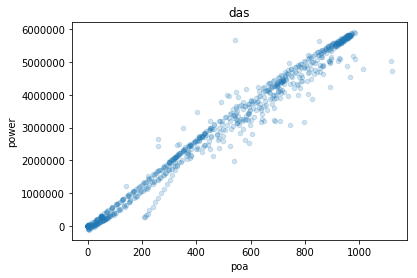

In [11]:
das.scatter()

In this example, we have multiple measurements of the same value from different sensors.  In this case a common first step is to compare measurements from the different sensors and remove data for timestamps where the measurements differ above some acceptable threshold.  The `filter_sensors` method provides a convient method to accomplish this taks for the groups of measurements identified as regression values.

In [12]:
das.filter_sensors()

The `get_summary` method will return a dataframe summarizing the filtering steps that have been applied, the agruments passed to them, the number of points prior to filtering, and the number of points after filtering.

In [13]:
das.get_summary()

,,pts_before_filter,pts_removed,filter_arguments
das,filter_sensors,1245,195,"(),"


The `custom_filter` method provides a means to update the summary data when using filtering functions not defined as `CapData` methods.  The `custom_filter` method allows passing any function or method that takes a DataFrame as the first argument and returns the filtered dataframe with rows removed.  Passed methods can be user-defined or Pandas DataFrame methods.

Below, we use the `custom_filter` method with the pandas DataFrame `dropna` method to removing missing data and update the summary data.

In [14]:
das.custom_filter(pd.DataFrame.dropna)

The `filter_irr` method provides a convient way to remove remove data based on the irradiance measurments.  Here we use it to simply remove periods of low irradiance.

In [15]:
das.get_summary()

pts_before_filter  pts_removed  \
das filter_sensors               1245          195   
    custom_filter                1240            5   

                                                   filter_arguments  
das filter_sensors                                             (),   
    custom_filter   (<function DataFrame.dropna at 0x11f9a0ea0>,),

In [16]:
das.filter_irr(200, 2000)

We can re-run the `scatter` method to see the results of the filtering steps.

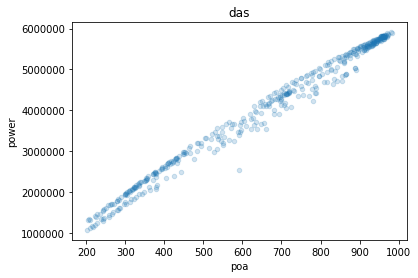

In [17]:
das.scatter()

The `filter_outliers` method uses scikit-learn's elliptic envelope to remove outlier points.  A future release will include a way to interactively select points to be removed.

In [18]:
das.filter_outliers()

//anaconda/envs/py36pd24pv_lib/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (34.745569610789588 > 34.315419180519640). You may want to try with a higher value of support_fraction (current value: 0.899).
  RuntimeWarning)
//anaconda/envs/py36pd24pv_lib/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (34.745569610789588 > 34.312055117595690). You may want to try with a higher value of support_fraction (current value: 0.899).
  RuntimeWarning)
//anaconda/envs/py36pd24pv_lib/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (34.745569610789588 > 34.317746596125964). You may want to try with a higher value of support_fraction (curren

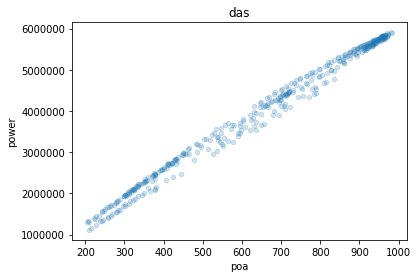

In [19]:
das.scatter()

The `reg_cpt` method performs a regression on the data stored in df_flt using the regression equation specified by the standard.  The regression equation is stored in the `reg_fml` attribute as shown below.  Regressions are performed using the statsmodels package.

The `reg_cpt` method has an option to filter data based on the regression results as specified in the standard, as demonstrated below.

In [20]:
das.reg_fml

'power ~ poa + I(poa * poa) + I(poa * t_amb) + I(poa * w_vel) - 1'

In [21]:
das.reg_cpt(filter=True, summary=False)

NOTE: Regression used to filter outlying points.




In [22]:
das.get_summary()

pts_before_filter  pts_removed  \
das filter_sensors                1245          195   
    custom_filter                 1240            5   
    filter_irr                     424          816   
    filter_outliers                407           17   
    reg_cpt                        385           22   

                                                    filter_arguments  
das filter_sensors                                              (),   
    custom_filter    (<function DataFrame.dropna at 0x11f9a0ea0>,),   
    filter_irr                                         (200, 2000),   
    filter_outliers                                             (),   
    reg_cpt                     (), 'filter': True, 'summary': False

____
#### Calculation of Reporting Conditions

The `rep_cond` method provide a variety of ways to calculate reporting conditions.  Using `rep_cond` the reporting conditions are always calculated from the data store in the df_flt attribute.  Refer to the example notebook "Reporting Conditions Examples" for a thourough explanation of the `rep_cond` functionality.  By default the reporting conditions are calcualted following the guidance of ASTM E2939-13.

In [23]:
das.rep_cond()

Reporting conditions saved to rc attribute.
          poa      t_amb     w_vel
0  762.726562  24.171644  1.991847


----

Previously we used the irradiance filter to filter out data below 200 W/m<sup>2</sup>.  The irradiance filter can also be used to filter irradiance based on a percentage band around a reference value.  This approach is shown here to remove data where the irradiance is outside of +/- 50% of the reporting irradiance.

In [24]:
das.filter_irr(0.5, 1.5, ref_val=das.rc['poa'][0])

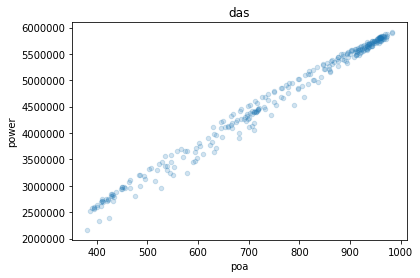

In [25]:
das.scatter()

The regression method is used again without the filter option to perform the final regression of the measured data. The result of the regression is statsmodels object containing the regression coefficients and other information generated when performing the regression.  This object is stored in the CapData `ols_model` attribute.

In [26]:
das.reg_cpt()

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.697e+05
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:45:33   Log-Likelihood:                -3681.8
No. Observations:                 294   AIC:                             7372.
Df Residuals:                     290   BIC:                             7386.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
poa             7781.4155     58.961    131.

In [27]:
das.ols_model.params

poa               7781.415507
I(poa * poa)        -0.456892
I(poa * t_amb)     -51.775758
I(poa * w_vel)      12.338299
dtype: float64

In [28]:
das.ols_model.pvalues

poa               5.470671e-261
I(poa * poa)       2.831264e-29
I(poa * t_amb)     3.206279e-59
I(poa * w_vel)     1.090903e-02
dtype: float64

## Load and Filter PVsyst Data

To load and filter the modeled data, typically from PVsyst, we simply create a new CapData object, load the PVsyst data, and apply the filtering methods as appropriate.

In [29]:
sim = pvc.CapData('sim')

To load pvsyst data we use the load_data method with the load_pvsyst option set to True.  By default the `load_data` method will search for a csv file that includes 'pvsyst' in the filename in a 'data' directory in the same directory as this file.  If you have saved the pvsyst file in a different location, you can use the path and fname arguments to load it.

In [30]:
sim.load_data(load_pvsyst=True)

Skipped file: example_meas_data.csv
Read: pvsyst_example_HourlyRes_2.CSV
Skipped file: nrel_data.csv


In [31]:
sim.trans

{'shade--': ['FShdBm'],
 'pvsyt_losses--': ['IL Pmax', 'IL Pmin', 'IL Vmax', 'IL Vmin'],
 '-inv-': ['EOutInv'],
 'irr-poa-': ['GlobInc'],
 'wind--': ['WindVel'],
 'irr-ghi-': ['GlobHor'],
 'temp-amb-': ['TAmb'],
 'temp-mod-': ['TArray'],
 'index--': ['index'],
 'real_pwr--': ['E_Grid']}

In [32]:
sim.set_reg_trans(power='real_pwr--', poa='irr-poa-', t_amb='temp-amb-', w_vel='wind--')

In [33]:
# sim.plot()

In [34]:
# Write over cptest.flt_sim dataframe with a copy of the original unfiltered dataframe
sim.reset_flt()

As a first step we use the `filter_time` method to select a 60 day period of data centered around the measured data.

In [35]:
sim.filter_time(test_date='10/11/1990', days=60)

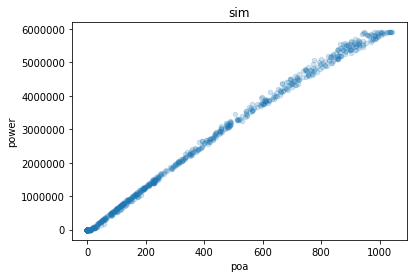

In [36]:
sim.scatter()

In [37]:
sim.filter_irr(200, 930)

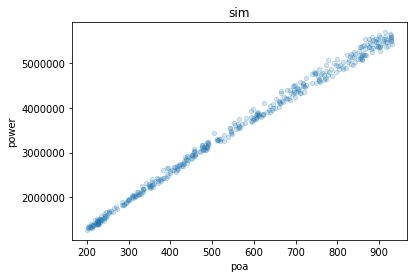

In [38]:
sim.scatter()

In [39]:
sim.get_summary()

pts_before_filter  pts_removed  \
sim filter_time               1441         7319   
    filter_irr                 397         1044   

                                          filter_arguments  
sim filter_time  (), 'test_date': '10/11/1990', 'days': 60  
    filter_irr                                (200, 930),

The `filter_pvsyt` method removes data for times when shade is present or the 'IL Pmin', IL Vmin', 'IL Pmax', 'IL Vmax' output values are greater than 0.

In [40]:
sim.filter_pvsyst()

In [41]:
sim.filter_irr(0.5, 1.5, ref_val=das.rc['poa'][0])

In [42]:
sim.reg_cpt()

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.587e+06
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:45:34   Log-Likelihood:                -3245.9
No. Observations:                 284   AIC:                             6500.
Df Residuals:                     280   BIC:                             6514.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
poa             7662.7945     15.456    495.

# Results

The `get_summary` and `res_summary` functions display the results of filtering on simulated and measured data and the final capacity test results comparing measured capacity to expected capacity, respectively.

In [43]:
pvc.get_summary(das, sim)

pts_before_filter  pts_removed  \
das filter_sensors                1245          195   
    custom_filter                 1240            5   
    filter_irr                     424          816   
    filter_outliers                407           17   
    reg_cpt                        385           22   
    rep_cond                       385            0   
    filter_irr                     294           91   
    reg_cpt                        294            0   
sim filter_time                   1441         7319   
    filter_irr                     397         1044   
    filter_pvsyst                  397            0   
    filter_irr                     284          113   
    reg_cpt                        284            0   

                                                    filter_arguments  
das filter_sensors                                              (),   
    custom_filter    (<function DataFrame.dropna at 0x11f9a0ea0>,),   
    filter_irr                                         (200, 2000),   
    filter_outliers                                             (),   
    reg_cpt                     (), 'filter': True, 'summary': False  
    rep_cond                                                    (),   
    filter_irr              (0.5, 1.5), 'ref_val': 762.7265615000001  
    reg_cpt                                                     (),   
sim filter_time            (), 'test_date': '10/11/1990', 'days': 60  
    filter_irr                                          (200, 930),   
    filter_pvsyst                                               (),   
    filter_irr              (0.5, 1.5), 'ref_val': 762.7265615000001  
    reg_cpt                                                     (),

In [44]:
pvc.res_summary(sim, das, 6000, '+/- 7', print_res=True)

Using reporting conditions from das. 

Capacity Test Result:         PASS
Modeled test output:          4781111.801
Actual test output:           4733483.041
Tested output ratio:          0.990
Tested Capacity:              5940.229
Bounds:                       5580.0, 6420.0


Using reporting conditions from das. 

Capacity Test Result:         PASS
Modeled test output:          4782948.044
Actual test output:           4733483.041
Tested output ratio:          0.990
Tested Capacity:              5937.948
Bounds:                       5580.0, 6420.0


99.000% - Cap Ratio
98.970% - Cap Ratio after pval check


,das_pvals,sim_pvals,das_params,sim_params
poa,0.00000,0.00000,"7,781.41551","7,662.79447"
I(poa * poa),0.00000,0.00000,-0.45689,-0.83351
I(poa * t_amb),0.00000,0.00000,-51.77576,-31.28454
I(poa * w_vel),0.01091,0.28878,12.33830,-1.20866


Uncomment and run the below lines to produce a scatter plot overlaying the final measured and PVsyst data.

In [45]:
# %%opts Scatter (alpha=0.3)
# das.scatter_hv() * sim.scatter_hv()